<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Industrial_fan_PdM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Datasets/Industrial_fan.csv')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                    1551         42.8                0       0  
1                    1408         46.3                3       0  
2                    1498         49.4                5       0  
3                    1433         39.5                7       0  
4                    1408         40.0                9       0  


In [27]:
# Droppingg irrelevant columns
df = df.drop(columns=["UDI", "Product ID"])
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


In [28]:
# Encode categorical variable 'Type'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Type"] = label_encoder.fit_transform(df["Type"])

In [29]:
#Defning Feature and target here.
X = df.drop(columns=["Target"])
y = df["Target"]

In [30]:
# Splitting dataset for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4058,2,302.0,310.9,1456,47.2,54
1221,2,297.0,308.3,1399,46.4,132
6895,2,301.0,311.6,1357,45.6,137
9863,1,298.9,309.8,1411,56.3,84
8711,1,297.1,308.5,1733,28.7,50
...,...,...,...,...,...,...
980,1,296.1,306.7,1409,42.8,134
4266,1,302.7,311.1,1440,39.5,146
7772,0,300.3,311.5,1464,41.0,29
5780,1,301.7,311.2,1517,42.4,113


In [31]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "XGBR": XGBClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "Voting Classifier": VotingClassifier(
        estimators=[("rf", RandomForestClassifier()), ("gb", GradientBoostingClassifier()), ("xgb", XGBClassifier())], voting='soft'
    ),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Stacking Classifier": StackingClassifier(
        estimators=[("rf", RandomForestClassifier()), ("gb", GradientBoostingClassifier()), ("xgb", XGBClassifier())]
    )
}

In [36]:
results = {}
best_model = None
best_score = 0

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [38]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

    if roc_auc > best_score:
        best_score = roc_auc
        best_model = model

    print(f"{name}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 = {f1:.4f}, ROC-AUC = {roc_auc:.4f}")


Logistic Regression: Accuracy = 0.9680, Precision = 0.6667, Recall = 0.1176, F1 = 0.2000, ROC-AUC = 0.9004
Decision Tree: Accuracy = 0.9795, Precision = 0.6800, Recall = 0.7500, F1 = 0.7133, ROC-AUC = 0.8688
Random Forest: Accuracy = 0.9850, Precision = 0.8800, Recall = 0.6471, F1 = 0.7458, ROC-AUC = 0.9645
Gradient Boost: Accuracy = 0.9850, Precision = 0.8654, Recall = 0.6618, F1 = 0.7500, ROC-AUC = 0.9684
XGBR: Accuracy = 0.9875, Precision = 0.8909, Recall = 0.7206, F1 = 0.7967, ROC-AUC = 0.9662
SVM: Accuracy = 0.9720, Precision = 0.8750, Recall = 0.2059, F1 = 0.3333, ROC-AUC = 0.9453
Voting Classifier: Accuracy = 0.9865, Precision = 0.8868, Recall = 0.6912, F1 = 0.7769, ROC-AUC = 0.9726
Bagging Classifier: Accuracy = 0.9845, Precision = 0.8364, Recall = 0.6765, F1 = 0.7480, ROC-AUC = 0.9399
Stacking Classifier: Accuracy = 0.9870, Precision = 0.9038, Recall = 0.6912, F1 = 0.7833, ROC-AUC = 0.9717


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression    0.9680   0.666667  0.117647  0.200000  0.900393
Decision Tree          0.9795   0.680000  0.750000  0.713287  0.868789
Random Forest          0.9850   0.880000  0.647059  0.745763  0.964503
Gradient Boost         0.9850   0.865385  0.661765  0.750000  0.968442
XGBR                   0.9875   0.890909  0.720588  0.796748  0.966166
SVM                    0.9720   0.875000  0.205882  0.333333  0.945325
Voting Classifier      0.9865   0.886792  0.691176  0.776860  0.972628
Bagging Classifier     0.9845   0.836364  0.676471  0.747967  0.939863
Stacking Classifier    0.9870   0.903846  0.691176  0.783333  0.971661


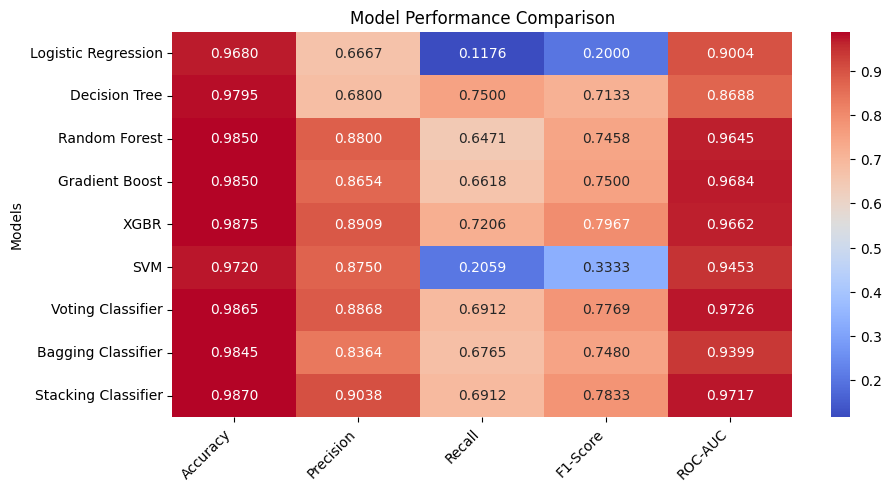

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
results_df = pd.DataFrame(results).T
print(results_df)
plt.figure(figsize=(10, 5))
sns.heatmap(results_df, annot=True, cmap="coolwarm", fmt=".4f")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.show()